# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
import re
import os
import requests
from timeit import default_timer as timer
import datetime
%matplotlib inline
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

## Data Gathering

In [2]:
# Import file with twitter posts as a pandas dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv', sep =',')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# download programatically the dataset with dog breed predictions.
r = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(r)
with open(os.path.join(r.split('/')[-1]), mode='wb') as file:
        file.write(response.content)
        
imp_df = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Twitter API keys (delete before sharing)

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [6]:
# query the Twitter API for each tweet's JSON data using Python's Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
# Dataframe with the tweet ids in twitter_archive-enhanced.csv
tweet_ids = df_archive.tweet_id

In [ ]:
# retrieve the full JSON for the status of each id in twitter-archive-enhanced.csv
# This script takes over 35 minutes to run
failed_id = []
with open('tweet_json.txt', 'w', encoding='UTF-8') as json_file:
    for id_ in tweet_ids:
        try:
            tweet = api.get_status(id_)
            tweet = tweet._json
            json.dump(tweet, json_file)
            json_file.write('\n')
        except:
            print('Failed retrieving tweet with id ',id_)
            failed_id.append(id_)

In [8]:
# Read the contents of the created file and create a dataframe with the fields of interest 

df = []
with open('tweet_json.txt') as f:
    for line in f:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
        
df_extended = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])

## Assessing Data



In [9]:
# print dataset infomation
df_extended

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,3261,20562,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,2158,12041,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,16716,56848,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,4429,28226,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,7711,32467,Wed Jul 26 15:59:51 +0000 2017


In [11]:
df_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
create_date       2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [119]:
# Display statistical details of the dataset
df_extended.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [126]:
# Check the distributions for rating_numerator and rating_denominator.
df_extended[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [12]:
# Display dataset info
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
df_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [120]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [124]:
# Check the distributions for rating_numerator and rating_denominator.
df_archive[['rating_numerator','rating_denominator']].describe() 


,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [125]:
# print and count the dogs name and data type
df_archive['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Toby           7
Daisy          7
Bailey         7
Buddy          7
Leo            6
Milo           6
Jax            6
Dave           6
Bella          6
Scout          6
Oscar          6
Rusty          6
Stanley        6
Koda           6
Jack           6
Bentley        5
            ... 
Kallie         1
Grizzie        1
Julius         1
Ulysses        1
Schnozz        1
Bobbay         1
Lilah          1
Yukon          1
Bobby          1
Sobe           1
Farfle         1
Ralphy         1
Swagger        1
Monster        1
Joey           1
Newt           1
Sonny          1
Lambeau        1
Chuck          1
Alejandro      1
Tayzie         1
Durg           1
Dewey          1
Derby          1
Snoop          1
Ito            1
Orion          1
Grizzwald     

In [67]:
# display and count each dogs stage and data type 
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [68]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [69]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [70]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [46]:
imp_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
# check one observation
imp_df.iloc[4]

tweet_id                                 666049248165822465
jpg_url     https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
img_num                                                   1
p1                                       miniature_pinscher
p1_conf                                            0.560311
p1_dog                                                 True
p2                                               Rottweiler
p2_conf                                            0.243682
p2_dog                                                 True
p3                                                 Doberman
p3_conf                                            0.154629
p3_dog                                                 True
Name: 4, dtype: object

In [47]:
imp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues
1. Inappropriate labeling of Dogs without names instead of "None"

2. Tweet_id fields in the three datasets are stored as int instead of strings.

3. Some rating_denominator do not equal 10

4. For a more precise analysis timestamp column should 
   be in datetime format instead of string.

5. Rating_numerator in most cases is in between 0 and 15, should be less than or equal to 
   15
   
6. Retweet and favorite count columns have float as datatype and should be int.

7. Truncate variable img_num column.

8. Drop redundant retweets rows in df_archive_clean dataframe.

### Tidiness issues
1. Variables doggo, floofer, pupper and puppo in one column

2. Predictions should be arranged into 3 columns p1, p2, p3, p1_cof, p2_cof,  
   p3_cof, p1_dog, p2_dog, and p3_dog should be.
   
3. "Retweet count" and "favorite count" columns are not in the df_archive.

 

## Cleaning Data

In [10]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
imp_df_clean = imp_df.copy()
df_extended_clean = df_extended.copy()

# Quality Cleaning

### Issue #1:  Inappropriate labeling of Dogs without names instead of "None"

#### Define: Replace all the wrongly named dogs with none

#### Code

In [18]:
wrong_name_list = list(df_archive_clean.query('name == "a" or name == "an"').index)

In [31]:
for i in wrong_name_list:
   df_archive_clean.name[i] = "None"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [ ]:
for i in wrong_name_list:
    if df_archive_clean.name[i] != "None":
        print("wrong name")

In [19]:
df_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Issue #2: Tweet_id fields in the three datasets are stored as int   instead of strings.

#### Define: Change the int datatypes for the tweet_id variable in the three datasets to object. 

#### Code

In [22]:
df_extended_clean['tweet_id'] = df_extended_clean['tweet_id'].astype(str)
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
imp_df_clean['tweet_id'] = imp_df_clean['tweet_id'].astype(str)

#### Test

In [23]:
print(df_extended_clean.tweet_id.dtype)
print(df_archive_clean.tweet_id.dtype)
print(imp_df_clean.tweet_id.dtype)

object
object
object


### Issue #3: Some rating_denominators not equal to  10

#### Define: Identify the list of rating_denominator not equal 10, then drop those rows.

#### Code

In [32]:
not_ten = list(df_archive_clean.query("rating_denominator != 10").index)
df_archive_clean.drop(index=not_ten, inplace=True)

#### Test

In [33]:
df_archive_clean.query("rating_denominator != 10").index

Int64Index([], dtype='int64')

### Issue #4: Timestamp in df_archive dataset datatype is in wrong format.

#### Define: Change timestamp datatype in df_archive_clean dataframe from object to datatime datatype.



#### Code

In [34]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [35]:
df_archive_clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
stages                                object
dtype: object

### Issue #5: Rating_numerator in most cases is in between 0 and 15, should be equal to or less than 15

#### Define: We will make all rating_numerators to be equal or less than 15

#### Code

In [36]:
df_archive_clean.loc[df_archive_clean['rating_numerator']>15, 'rating_numerator'] = 15

#### Test

In [37]:
df_archive_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.300000e+01,7.300000e+01,1.800000e+02,1.800000e+02,2333.000000,2333.0
mean,7.456060e+17,2.152128e+16,7.722159e+17,1.248597e+16,10.722675,10.0
std,7.600519e+16,1.294404e+17,6.249820e+16,9.625580e+16,2.189713,0.0
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,10.0
25%,6.754971e+17,3.589728e+08,7.171759e+17,4.196984e+09,10.000000,10.0
50%,7.044857e+17,4.196984e+09,7.805335e+17,4.196984e+09,11.000000,10.0
75%,8.233264e+17,4.196984e+09,8.204234e+17,4.196984e+09,12.000000,10.0
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,15.000000,10.0


### Issue #6: Retweet and favorite count columns have float as datatype and should be int.

#### Define: Convert the datatypes for the retweet_count and favorite_count variables from float to int in df_extended_clean dataset

#### Code

In [11]:
# Changing NaNs into 0, for the dtype conversion to int to work
df_extended_clean['retweet_count'] = df_extended_clean['retweet_count'].fillna(0).astype(int)
df_extended_clean['favorite_count'] = df_extended_clean['favorite_count'].fillna(0).astype(int)
df_extended_clean['retweet_count'] = df_extended_clean['retweet_count'].astype(int)
df_extended_clean['favorite_count'] = df_extended_clean['favorite_count'].astype(int)

#### Test

In [23]:
df_extended_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
create_date       2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


### Issue #7: Truncate variable img_num column.

#### Define: Truncate img_num from imp_df dataframe.

#### Code

In [ ]:
imp_df_clean.drop('img_num', axis = 1, inplace = True)

#### Test

In [55]:
imp_df_clean.head()

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Issue #8: Drop redundant retweets rows in df_archive_clean dataframe.

#### Define:  Truncate retweets rows: 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns by index.

#### Code

In [14]:
retweets_index = list(df_archive_clean[df_archive_clean["retweeted_status_id"].isnull()==False].index)

df_archive_clean.drop(axis=0, index=retweets_index, inplace=True)

In [15]:
df_archive_clean.drop(['in_reply_to_status_id',
                       'in_reply_to_user_id',
                       'retweeted_status_id', 
                       'retweeted_status_user_id', 
                       'retweeted_status_timestamp'],
                      axis=1,
                      inplace=True)

#### Test

In [58]:
for retweet in retweets_index:
    if retweet in list(df_archive_clean.index):
        print('Found a retweet')

In [16]:
df_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


# Tidiness Cleaning

### Issue #1: Variables doggo, floofer, pupper and puppo should be in one column

#### Define: doggo, floofer, pupper, and puppo values should not be individual columns, so these columns should be melted into one column called dog_stages.

#### Code

In [17]:
df_archive_clean['doggo'] = df_archive_clean['doggo'].str.replace('None','',regex=False)
df_archive_clean['floofer'] = df_archive_clean['floofer'].str.replace('None','',regex=False)
df_archive_clean['pupper'] = df_archive_clean['pupper'].str.replace('None','',regex=False)
df_archive_clean['puppo'] = df_archive_clean['puppo'].str.replace('None','',regex=False) 

In [18]:
df_archive_clean['dog_stage'] = (df_archive_clean['pupper']+' '+df_archive_clean['doggo']+' '+df_archive_clean['puppo']+' '+df_archive_clean['floofer']).str.strip()

In [19]:
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].str.replace('  ',' ',regex=False) 

In [20]:
df1_archive_clean = df_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'])

#### Test

In [64]:
df1_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 203.9+ KB


### Issue #2: Predictions should be arranged into 2 columns instead of p1, p2, p3, p1_cof, p2_cof,p3_cof, p1_dog, p2_dog, and p3_dog.

## Define: The different predictions, need to be transposed into 2 columns:  confidence and breed.

#### Code

In [ ]:
# setup the conditions for selection
conditions = [(imp_df_clean['p1_dog'] == True),
              (imp_df_clean['p2_dog'] == True),
              (imp_df_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [imp_df_clean['p1'], 
                 imp_df_clean['p2'],
                 imp_df_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [imp_df_clean['p1_conf'], 
                      imp_df_clean['p2_conf'], 
                      imp_df_clean['p3_conf']]

# select the predicted breed based on the first successful condition
imp_df_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
imp_df_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

#### Test

In [49]:
imp_df_clean.head(2)

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826


In [32]:
imp_df_clean.drop(['p1', 'p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

In [66]:
imp_df_clean.head(1)

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074


### Issue #3: "Retweet count" and "favorite count" columns are not in the df_archive dataframe.

#### Define: Merge df_extended_clean dataframe which contains [retweet_count_and_favorite_count] with df_archive_clean dataframe.

#### Code

In [38]:
# merging df_extended and df_archive dataframe
df_extended_clean = pd.DataFrame(df_extended_clean, columns=["tweet_id", "retweet_count", "favorite_count"])
df1_archive_clean.tweet_id = df1_archive_clean.tweet_id.astype('str')
df1_archive_clean = pd.merge(df1_archive_clean, df_extended_clean,
                on=['tweet_id'], how='left')

#### Test

In [40]:
df1_archive_clean.drop(['retweet_count_x',
                       'favorite_count_x',
                       'retweet_count_y', 
                       'favorite_count_y'],
                      axis=1,
                      inplace=True)

In [50]:
# merge all the 3 dataframes 
all_df = pd.merge(df1_archive_clean, imp_df_clean,
                on=['tweet_id'], how='left')

In [51]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
retweet_count         2175 non-null int64
favorite_count        2175 non-null int64
jpg_url               1994 non-null object
breed                 1994 non-null object
confidence            1994 non-null float64
dtypes: float64(1), int64(4), object(9)
memory usage: 254.9+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
# saving the merged data as "twitter_archive_master.csv" and storing it into the file directory.
twitter_archive_master = all_df.copy()

out_file = 'twitter_archive_master.csv'
twitter_archive_master.to_csv(out_file, index=False)

In [51]:
# print the files in the directory
ls *.csv

twitter-archive-enhanced.csv  twitter_archive_master.csv


## Analyzing and Visualizing Data

In [53]:
# read the twitter_archive_master.csv into a dataframe
df_master = pd.read_csv('twitter_archive_master.csv')

In [54]:
df_master.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confidence
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,none,0.0


### Insights:
1. Is favorite count correlated with retweet count?

2. What is the most popular dog stages

3. What dog breeds are More common 

### Visualization

### 1.  Is favorite count correlated with retweet count?

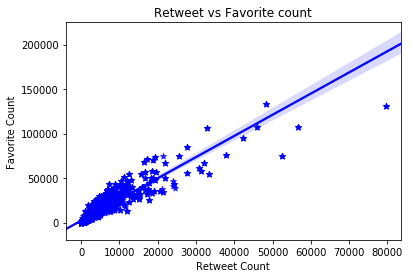

In [80]:
# finding correlation between favorite and retweet count.
sns.regplot(x= df_master.retweet_count, y= df_master.favorite_count, marker= '*', color= 'b')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Retweet vs Favorite count');

In [76]:
#calculate correlation coeffcients: 
df_master[['retweet_count', 'favorite_count']].corr().iloc[0,1]

0.91250688646587719

#### There seems to be a very strong correlation between retweet count and favorite count with correlation coefficient of about 0.91

### 2. What is the most popular dog stages

In [104]:
# find the most common doge stage by count
df_master.dog_stage.value_counts()

pupper           630
doggo            201
puppo             68
pupper doggo      28
floofer           23
doggo floofer      3
doggo puppo        3
Name: dog_stage, dtype: int64

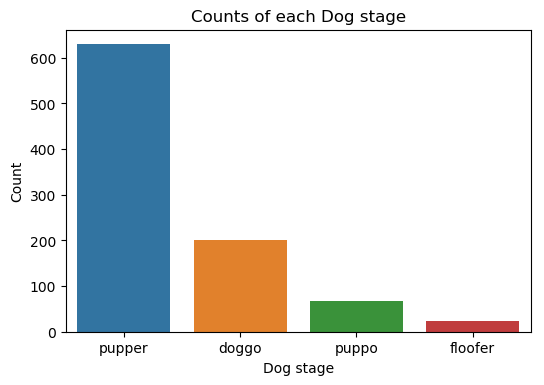

In [108]:
# Extract various dog stages
df_master = twitter_archive_master['dog_stage'].notnull()
dog_stage_raw = twitter_archive_master.dog_stage.loc[df_master].str.split(',').tolist()
dog_stage = list(map(lambda x: x.strip(), itertools.chain.from_iterable(dog_stage_raw)))
dog_stage = np.array(dog_stage)

# Plot counts of each dog stage
plot_category_order = ['pupper', 'doggo', 'puppo', 'floofer']
plt.figure(dpi=100);
ax = sns.countplot(x=dog_stage, order=plot_category_order);
ax.set_title('Counts of each Dog stage');
ax.set_ylabel('Count');
ax.set_xlabel('Dog stage');

#### Obviously it seems pupper is the most popular dog stage.



### 3. What dog breeds has the most favorite count

In [74]:
# Analysing the most popular dog bread based on favourite count
fav_counts_breed = df_master[df_master.breed != 'none']
fav_counts_breed = fav_counts_breed.groupby(['breed'])
fav_counts_breed = fav_counts_breed['favorite_count'].sum()
fav_counts_breed = fav_counts_breed.sort_values(ascending = False)
top7_breeds_fav_counts = fav_counts_breed.head(7)
top7_breeds_fav_counts

breed
golden_retriever      1946934
Labrador_retriever    1274526
Pembroke              1039484
Chihuahua              746604
Samoyed                583906
French_bulldog         570921
chow                   446933
Name: favorite_count, dtype: int64

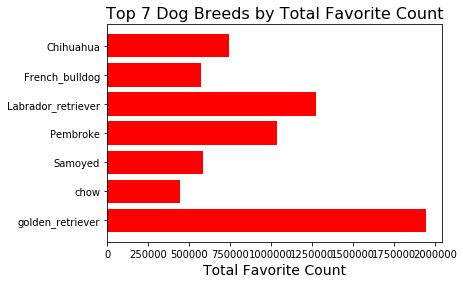

In [75]:
# plot barchart to display the top 7 dog breeds by favorite counts

plt.barh(top7_breeds_fav_counts.index, top7_breeds_fav_counts, color = 'r')

plt.xlabel('Total Favorite Count', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 12)
plt.title('Top 7 Dog Breeds by Total Favorite Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

#### Based on the analysis, golden retriever dog bread seems to have the highest-rated by favorite count.